# **Other**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('/content/drive/MyDrive/marking_hack/data.csv')

In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data['dt'] = pd.to_datetime(data['dt'])

In [5]:
data.head()

,dt,gtin,total,region_code
0,2022-08-08,1AF3D5B9E053CBDF908FB967FE3543AA,20478,77
1,2022-08-08,1AF3D5B9E053CBDF908FB967FE3543AA,20478,50
2,2022-08-08,1AF3D5B9E053CBDF908FB967FE3543AA,20478,78
3,2022-08-08,1AF3D5B9E053CBDF908FB967FE3543AA,27621,77
4,2022-08-08,1AF3D5B9E053CBDF908FB967FE3543AA,27621,50


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730612 entries, 0 to 730611
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   dt           730612 non-null  datetime64[ns]
 1   gtin         730612 non-null  object        
 2   total        730612 non-null  int64         
 3   region_code  730612 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 22.3+ MB


In [7]:
data['gtin'].value_counts()

1248F88441BCFC563FB99D77DB0BB80D    409812
289AEBCA82877CB19E7AA33E0E522883    119819
BB9D92ABF430CD193E3A35540D1B35CE     73084
1AF3D5B9E053CBDF908FB967FE3543AA     69127
3F2FB695D4F981545902C4700A03BEF2     58770
Name: gtin, dtype: int64

In [8]:
data['region_code'].value_counts()

77    253543
50    248788
78    228281
Name: region_code, dtype: int64

In [9]:
data = data.set_index('dt').sort_index()

In [10]:
data.head()

,gtin,total,region_code
dt,,,
2021-11-22,1248F88441BCFC563FB99D77DB0BB80D,8035,77
2021-11-22,1248F88441BCFC563FB99D77DB0BB80D,18471,50
2021-11-22,1248F88441BCFC563FB99D77DB0BB80D,4699,77
2021-11-22,1248F88441BCFC563FB99D77DB0BB80D,4699,78
2021-11-22,1248F88441BCFC563FB99D77DB0BB80D,4699,50


In [198]:
#data_77_1248F88441BCFC56 = data[(data['region_code'] == 77) & (data['gtin'] == '1248F88441BCFC563FB99D77DB0BB80D')].drop(['region_code', 'gtin'], axis=1)
#data_77_289AEBCA82877CB1 = data[(data['region_code'] == 77) & (data['gtin'] == '289AEBCA82877CB19E7AA33E0E522883')].drop(['region_code', 'gtin'], axis=1)
#data_50_1248F88441BCFC56 = data[(data['region_code'] == 50) & (data['gtin'] == '1248F88441BCFC563FB99D77DB0BB80D')].drop(['region_code', 'gtin'], axis=1)
#data_50_289AEBCA82877CB1 = data[(data['region_code'] == 50) & (data['gtin'] == '289AEBCA82877CB19E7AA33E0E522883')].drop(['region_code', 'gtin'], axis=1)

#data_all_1248F88441BCFC56 = data[data['gtin'] == '1248F88441BCFC563FB99D77DB0BB80D'].drop(['region_code', 'gtin'], axis=1)
#data_all_289AEBCA82877CB1 = data[data['gtin'] == '289AEBCA82877CB19E7AA33E0E522883'].drop(['region_code', 'gtin'], axis=1)
data_77_all = data[data['region_code'] == 77].drop(['region_code', 'gtin'], axis=1)
data_50_all = data[data['region_code'] == 50].drop(['region_code', 'gtin'], axis=1)

In [11]:
data.head()

,gtin,total,region_code
dt,,,
2021-11-22,1248F88441BCFC563FB99D77DB0BB80D,8035,77
2021-11-22,1248F88441BCFC563FB99D77DB0BB80D,18471,50
2021-11-22,1248F88441BCFC563FB99D77DB0BB80D,4699,77
2021-11-22,1248F88441BCFC563FB99D77DB0BB80D,4699,78
2021-11-22,1248F88441BCFC563FB99D77DB0BB80D,4699,50


In [12]:
data = data.drop(['gtin', 'region_code'], axis=1)

In [13]:
data.head()

,total
dt,
2021-11-22,8035
2021-11-22,18471
2021-11-22,4699
2021-11-22,4699
2021-11-22,4699


In [14]:
data = data.resample('1D').sum()

In [15]:
data.head()

,total
dt,
2021-11-22,34731564
2021-11-23,34589897
2021-11-24,36400797
2021-11-25,37735127
2021-11-26,48033849


In [16]:
data['total'].mean()

32418834.03561644

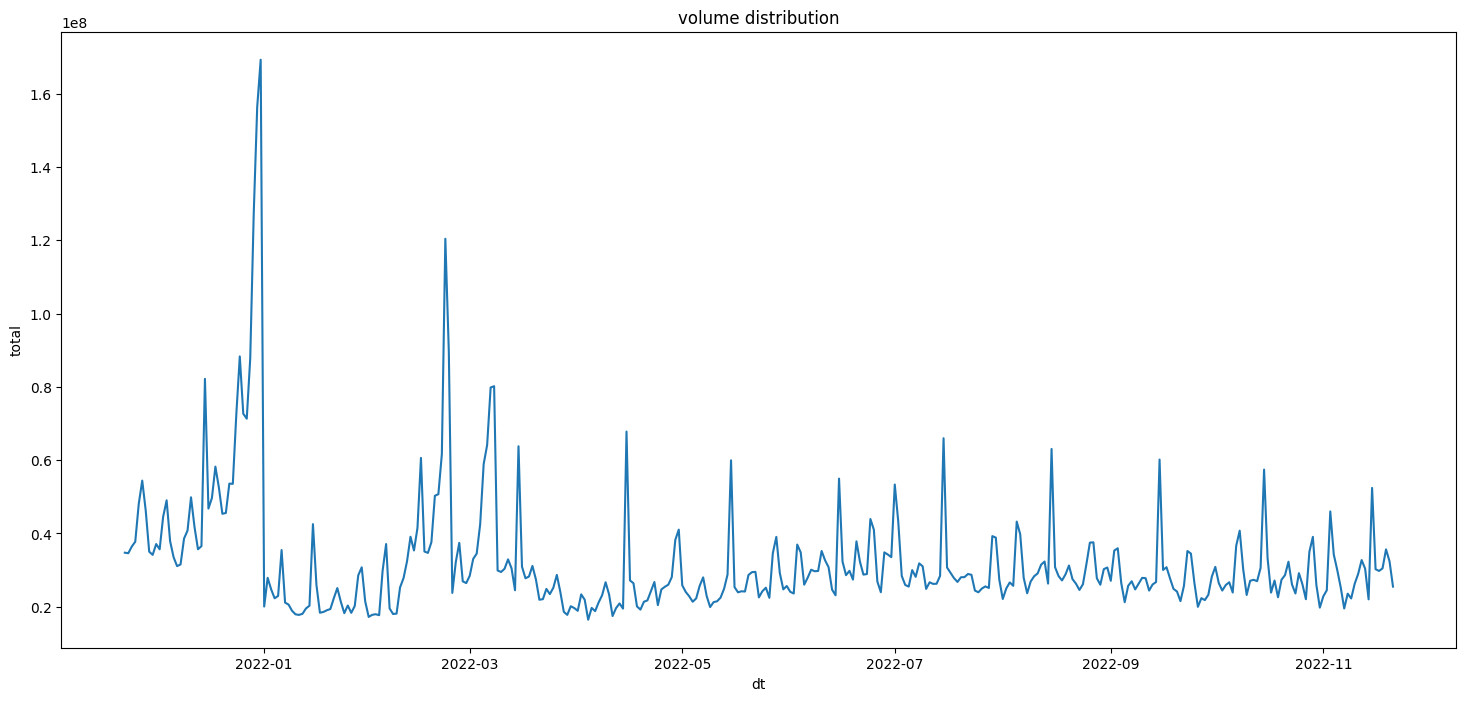

In [17]:
plt.figure(figsize=(18, 8))

sns.lineplot(x=data.index, y=data['total'])
plt.title('volume distribution')

plt.show()

In [18]:
def add_features(data, amount_of_lags=1, amount_of_sma=6, rolling_window=4, rolling_step=3):
    modified_data = data.copy()
    
    for i in range(1, amount_of_lags+1):
        modified_data['lag_{}'.format(i)] = modified_data['total'].shift(i)
        

    for i in range(amount_of_sma):
          col_name = 'moving_average_{}'.format(rolling_window+rolling_step*i)
          modified_data[col_name] = modified_data['total'].shift().rolling(rolling_window+rolling_step*i).mean()
    
    modified_data = modified_data.dropna()
    
    return modified_data
    

In [19]:
lagged_data = add_features(data.iloc[100:,:], 25, 5, 5, 5)

In [20]:
x = lagged_data.drop('total', axis=1)
y = lagged_data['total']

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=False, train_size=0.8, random_state=67)

In [21]:
tscv = TimeSeriesSplit(n_splits=5)

In [22]:
model = LinearRegression()
scores = cross_val_score(model, x_train, y_train, cv=tscv, scoring='neg_root_mean_squared_error')
print(scores)
print('avg rmse:', -round(sum(scores) / len(scores), 2))

[-15618844.69784128  -9268282.5846416   -8158834.51416794
  -7949655.34039261  -7092535.17422662]
avg rmse: 9617630.46


In [23]:
pred_median  = np.ones(y_test.shape) * y_test.median()
mean_squared_error(y_test, pred_median, squared=False)

7875389.63742914

In [24]:
pred_last = y_test.shift(fill_value=y_train[-1])
mean_squared_error(y_test, pred_last, squared=False)

9849578.368782843

In [25]:
model.fit(x, y)

LinearRegression()

In [26]:
y_predicted = model.predict(x_test)
mean_squared_error(y_test, y_predicted, squared=False)

7075043.172215744

In [27]:
model.fit(x, y)

LinearRegression()

# predict new data

In [28]:
for_save = data.reset_index(drop=True)

In [29]:
def predict_timeseries(model, data, amount_of_preds=3, amount_of_lags=25, amount_of_sma=5, rolling_window=5, rolling_step=5):

  temp_data = data.reset_index(drop=True)
  preds = []

  for i in range(amount_of_preds):
    temp_data = temp_data.append({'total':0}, ignore_index=True)
    lagged_data = add_features(temp_data, amount_of_lags, amount_of_sma, rolling_window, rolling_step)
    prediction = model.predict(lagged_data.drop('total', axis=1).tail(1))
    temp_data['total'].iloc[-1] = prediction
    preds.append(float(prediction))

  return preds




In [30]:
preds = predict_timeseries(model, data, 5)

<ipython-input-29-1367fb8f99be>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append({'total':0}, ignore_index=True)
<ipython-input-29-1367fb8f99be>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append({'total':0}, ignore_index=True)
<ipython-input-29-1367fb8f99be>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append({'total':0}, ignore_index=True)
<ipython-input-29-1367fb8f99be>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append({'total':0}, ignore_index=True)
<ipython-input-29-1367fb8f99be>:7: FutureWarning: The frame.append method is

In [31]:
preds

[27731656.654166665,
 27739848.654166665,
 29935304.654166665,
 31868616.654166665,
 28067528.654166665]

In [38]:
x_axis = pd.date_range(start='22/11/2021', freq='1M', periods=13)
x_axis

DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30'],
              dtype='datetime64[ns]', freq='M')

In [37]:
x_axis_2 = pd.date_range(start='30/11/2022', freq='1M', periods=5)
x_axis_2

DatetimeIndex(['2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31'],
              dtype='datetime64[ns]', freq='M')

In [39]:
data = data.append({'total':preds[0]}, ignore_index=True)

<ipython-input-39-7fb145a75be7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'total':preds[0]}, ignore_index=True)


In [ ]:
preds.insert(0, float(data['total'].tail(1)))

In [ ]:
sns.set()

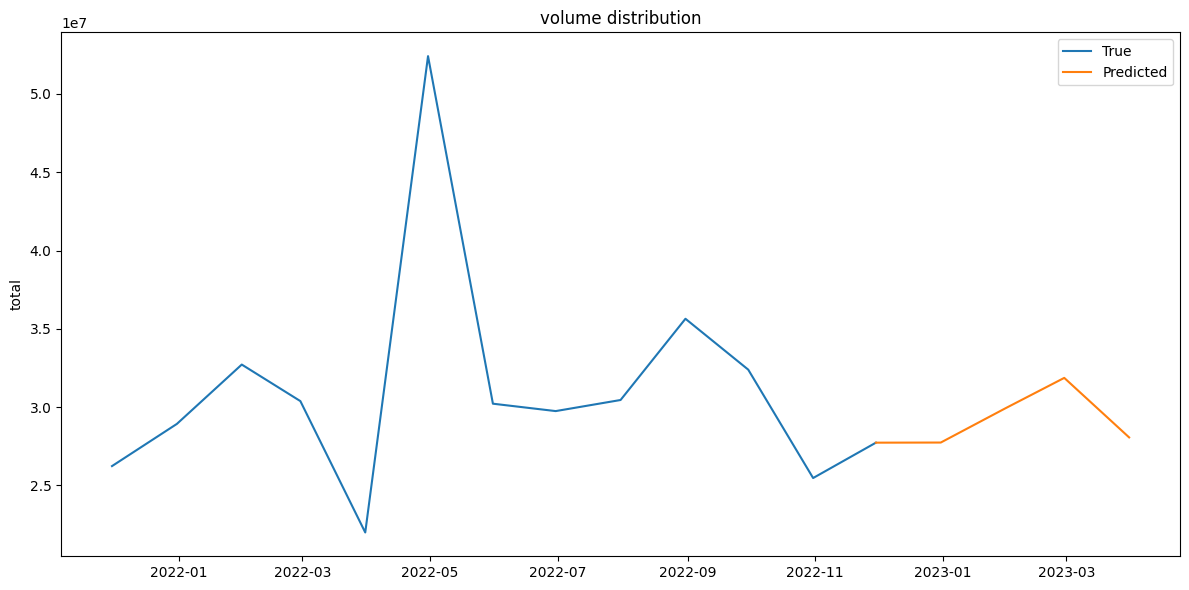

In [40]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=x_axis, y=data['total'].tail(13), label='True')
sns.lineplot(x=x_axis_2, y=preds, label='Predicted')
plt.title('volume distribution')
plt.legend()
plt.tight_layout()
plt.show()

In [195]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))

In [387]:
x_axis = pd.date_range(start='22/11/2021', freq='1M', periods=12)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Parsing '22/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [388]:
x_axis_2 = pd.date_range(start='31/10/2022', freq='1M', periods=6)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Parsing '31/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [389]:
#preds.insert(0, float(data['total'].tail(1)))

In [390]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=x_axis, y=data['total'].tail(13))
sns.lineplot(x=x_axis_2, y=preds)
plt.title('volume distribution')
#plt.tight_layout()
plt.show()

NameError: ignored

<Figure size 1800x800 with 0 Axes>

In [ ]:
data = data.append({'total':preds[0]}, ignore_index=True)

In [385]:
import plotly.express as px
import plotly.graph_objs as go

In [409]:
fig = px.line(x=x_axis, y=data['total'].tail(12), markers=True)

fig.add_trace(go.Scatter(
   x=x_axis,
   y=data['total'].tail(12),
   line=dict(color="#636EFA"),
   name="True"))

fig.add_trace(go.Scatter(
   x=x_axis_2,
   y=preds,
   line=dict(color="orange", dash = 'dot'),
   name="Predicted",
   mode='lines+markers'))
   
fig.update_layout(
   title="Outlet Distribution",
   xaxis_title="date",
   yaxis_title="sum",
   legend_title="legend",
   font=dict(family="Arial", size=20)
)

fig.show()

# data_77_1248F88441BCFC56

In [365]:
data_50_all.head()

,dt,total
1,2022-08-08,20478
4,2022-08-08,27621
7,2022-08-08,24989
10,2022-08-08,60470
13,2022-08-08,31135


In [366]:
data_50_all = data_50_all.set_index('dt').sort_index()

In [367]:
data_50_all = data_50_all.resample('1D').sum()

In [368]:
data_50_all.head()

,total
dt,
2021-11-22,11348234
2021-11-23,11426855
2021-11-24,11878648
2021-11-25,12385810
2021-11-26,15845747


In [369]:
for_save = data_50_all.reset_index(drop=True)

In [370]:
for_save.to_csv('data_50_all.csv', index=False)

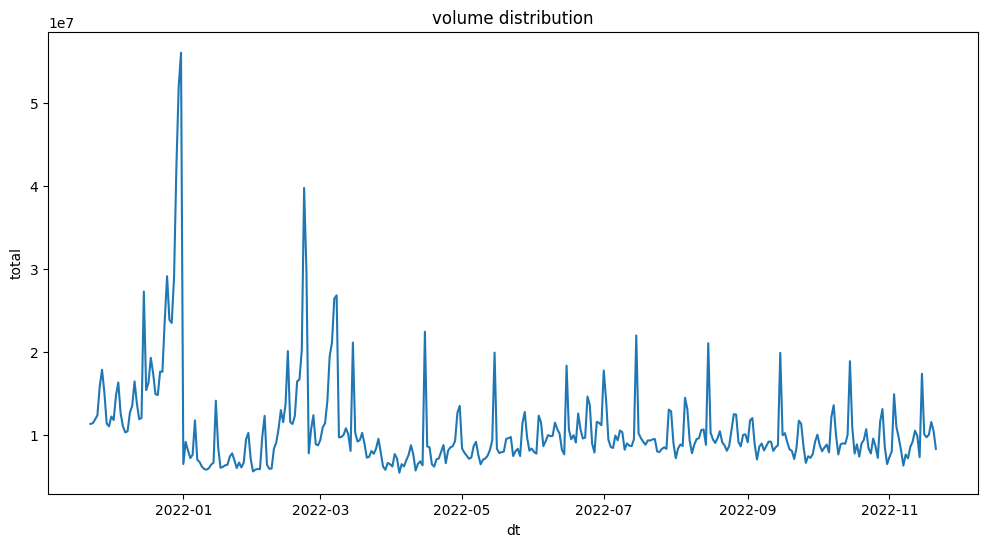

In [371]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=data_50_all.index, y=data_50_all['total'])
plt.title('volume distribution')

plt.show()

In [372]:
lagged_data = add_features(data_50_all.iloc[60:,:], 15, 0, 5, 5)

In [373]:
x = lagged_data.drop('total', axis=1)
y = lagged_data['total']

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=False, train_size=0.8, random_state=67)

In [374]:
tscv = TimeSeriesSplit(n_splits=5)

In [375]:
model = LinearRegression()
scores = cross_val_score(model, x_train, y_train, cv=tscv, scoring='neg_root_mean_squared_error')
print(scores)
print('avg rmse:', -round(sum(scores) / len(scores), 2))

[-5471819.11571302 -2925741.4884838  -2701915.88131042 -3525789.97740459
 -2470627.38522646]
avg rmse: 3419178.77


In [376]:
pred_median  = np.ones(y_test.shape) * y_test.median()
mean_squared_error(y_test, pred_median, squared=False)

2444932.8761071335

In [377]:
pred_last = y_test.shift(fill_value=y_train[-1])
mean_squared_error(y_test, pred_last, squared=False)

3007816.540236917

In [378]:
model.fit(x, y)
y_predicted = model.predict(x_test)
mean_squared_error(y_test, y_predicted, squared=False)

2281700.049516871

In [379]:
model.fit(x.iloc[60:], y.iloc[60:])

LinearRegression()

In [380]:
preds = predict_timeseries(model, data_50_all, 5, 15, 0, 5, 5)

<ipython-input-179-1367fb8f99be>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append({'total':0}, ignore_index=True)
<ipython-input-179-1367fb8f99be>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append({'total':0}, ignore_index=True)
<ipython-input-179-1367fb8f99be>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append({'total':0}, ignore_index=True)
<ipython-input-179-1367fb8f99be>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append({'total':0}, ignore_index=True)
<ipython-input-179-1367fb8f99be>:7: FutureWarning: The frame.append meth

In [381]:
preds

[9419363.9638866,
 9198850.909955196,
 9035034.242535656,
 9964097.711171966,
 9446722.202792544]

In [382]:
data_50_all.tail()

,total
dt,
2022-11-17,9738540
2022-11-18,10062541
2022-11-19,11571169
2022-11-20,10503568
2022-11-21,8338741


In [383]:
pickle.dump(model, open('model_50_all.pkl', 'wb'))